#### 라이브러리 및 옵션 설정

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family ='AppleGothic') #맥용 폰트 설정

#mpl.rc('font', family ='Malgun Gothic') #윈도우용 폰트 설정

plt.rcParams['axes.unicode_minus'] = False #마이너스 숫자가 잘 나오도록 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 그리는 옵션

/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17438/1657197479.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') #선명하게 그리는 옵션


#### 데이터 불러오기

In [3]:
df1 = pd.read_csv('chapter2_data.csv')
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0


#### 데이터 파악하기

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28555 non-null  int64  
 1   유형      28555 non-null  object 
 2   경로      28555 non-null  object 
 3   날짜      28555 non-null  object 
 4   결제유형    28555 non-null  object 
 5   제품명     28555 non-null  object 
 6   계약금액    28555 non-null  int64  
 7   상태      28555 non-null  object 
 8   연체      28555 non-null  int64  
 9   연체기록    28555 non-null  object 
 10  연결계좌    28555 non-null  object 
 11  해약여부    28555 non-null  object 
 12  나이      28555 non-null  float64
 13  마일리지    28555 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.1+ MB


In [5]:
df1.describe()

,id,계약금액,연체,나이,마일리지
count,2.855500e+04,28555.000000,28555.000000,28555.000000,28555.000000
mean,6.664544e+07,94956.571529,0.151042,46.583225,1967.358221
std,9.879706e+05,12591.330111,1.110066,13.397094,434.926055
min,2.573206e+07,55200.000000,0.000000,20.000000,877.000000
25%,6.665981e+07,87900.000000,0.000000,37.000000,1646.000000
50%,6.676788e+07,96900.000000,0.000000,46.000000,1947.000000
75%,6.678124e+07,98400.000000,0.000000,56.000000,2264.000000
max,6.696986e+07,215700.000000,15.000000,90.000000,3485.000000


In [7]:
df1.describe(include = 'object')

,유형,경로,날짜,결제유형,제품명,상태,연체기록,연결계좌,해약여부
count,28555,28555,28555,28555,28555,28555,28555,28555,28555
unique,2,18,101,2,6,4,2,42,2
top,렌탈,서비스 방문,2019-10-25,CMS,A,계약확정,없음,롯데카드,정상
freq,27128,8836,494,18557,21262,28047,27505,6142,28074


---

#### 단일변수

#### Histogram (Displot / kdeplot)
- [연속형] 데이터로 구성된 컬럼 하나 살펴볼 때

옵션 : bins, kde, rug + [hue]

<Axes: xlabel='계약금액', ylabel='Count'>

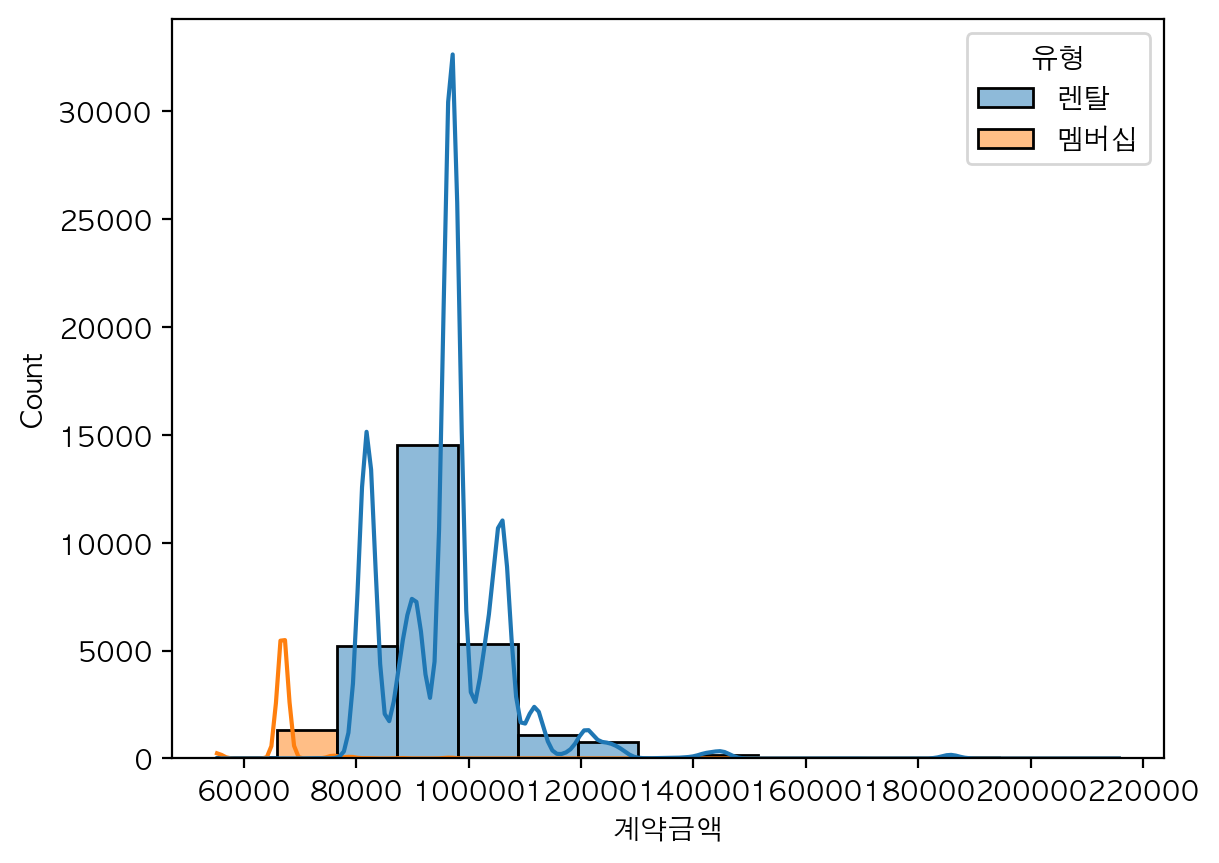

In [15]:
sns.histplot(data = df1, x = '계약금액', bins = 15, kde = True, hue = '유형') 

# 적당한 bins로 나누는 것이 관건
# kde 옵션을 통해 확률 밀도함수 (kde : Kernel Density Estimator)
# hue 옵션을 통해 범례 지정

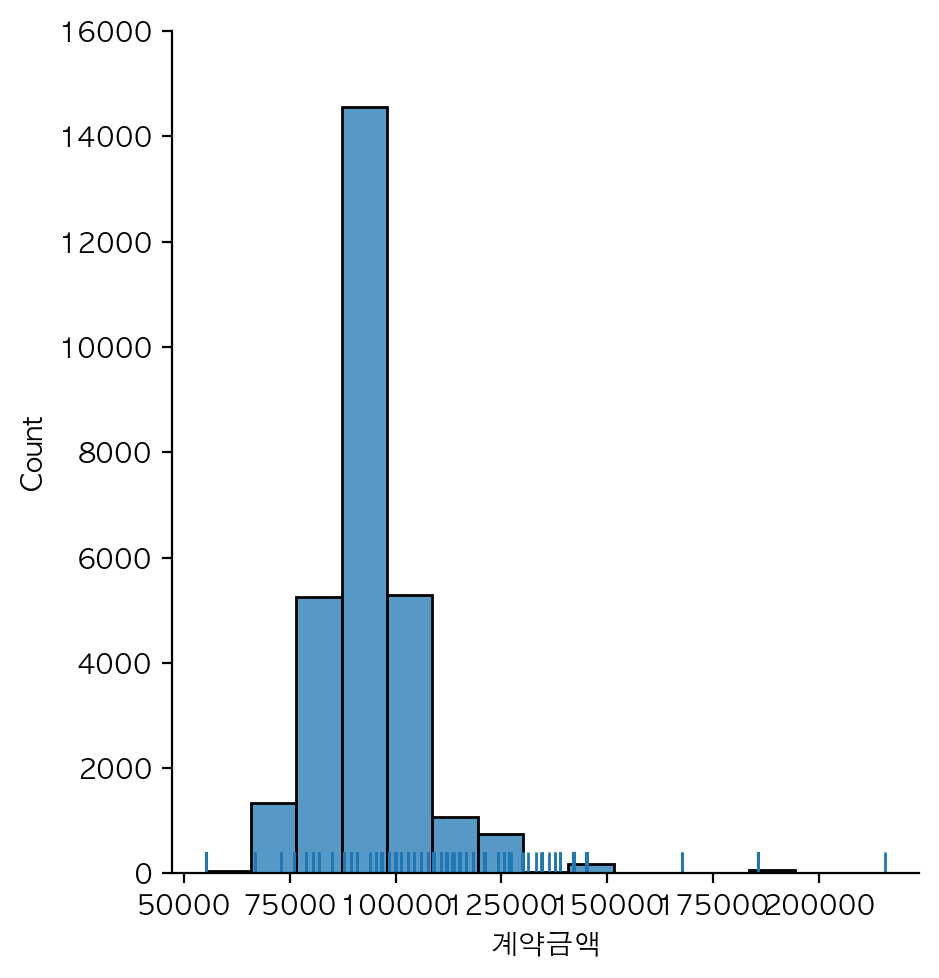

In [19]:
sns.displot(data = df1, x = '계약금액', bins = 15, rug = True) #rug 옵션을 통해 데이터 존제 확인

Q. 연령대에 따른 계약 유형

<Axes: xlabel='나이', ylabel='Density'>

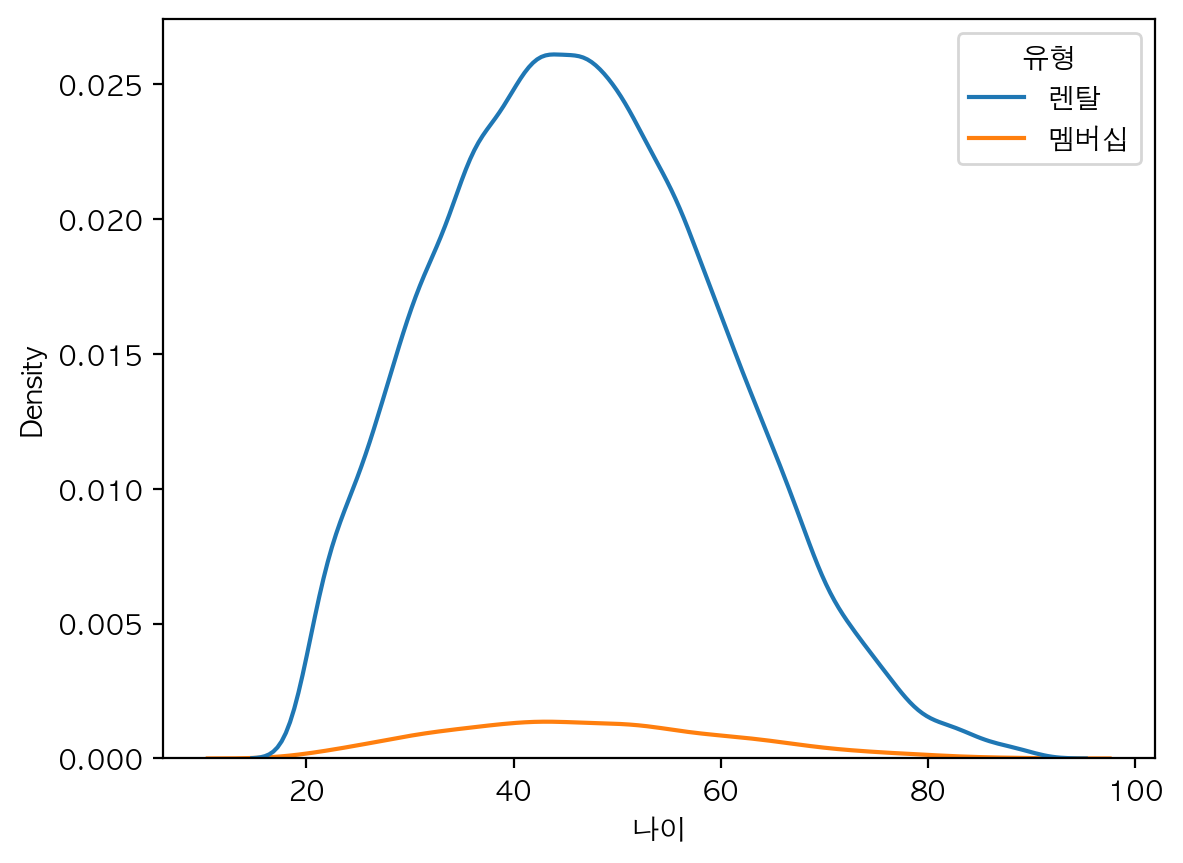

In [16]:
sns.kdeplot(data = df1, x = '나이', hue = '유형')

Q. 계약 금액에 따른 계약 유형

<Axes: xlabel='계약금액', ylabel='Density'>

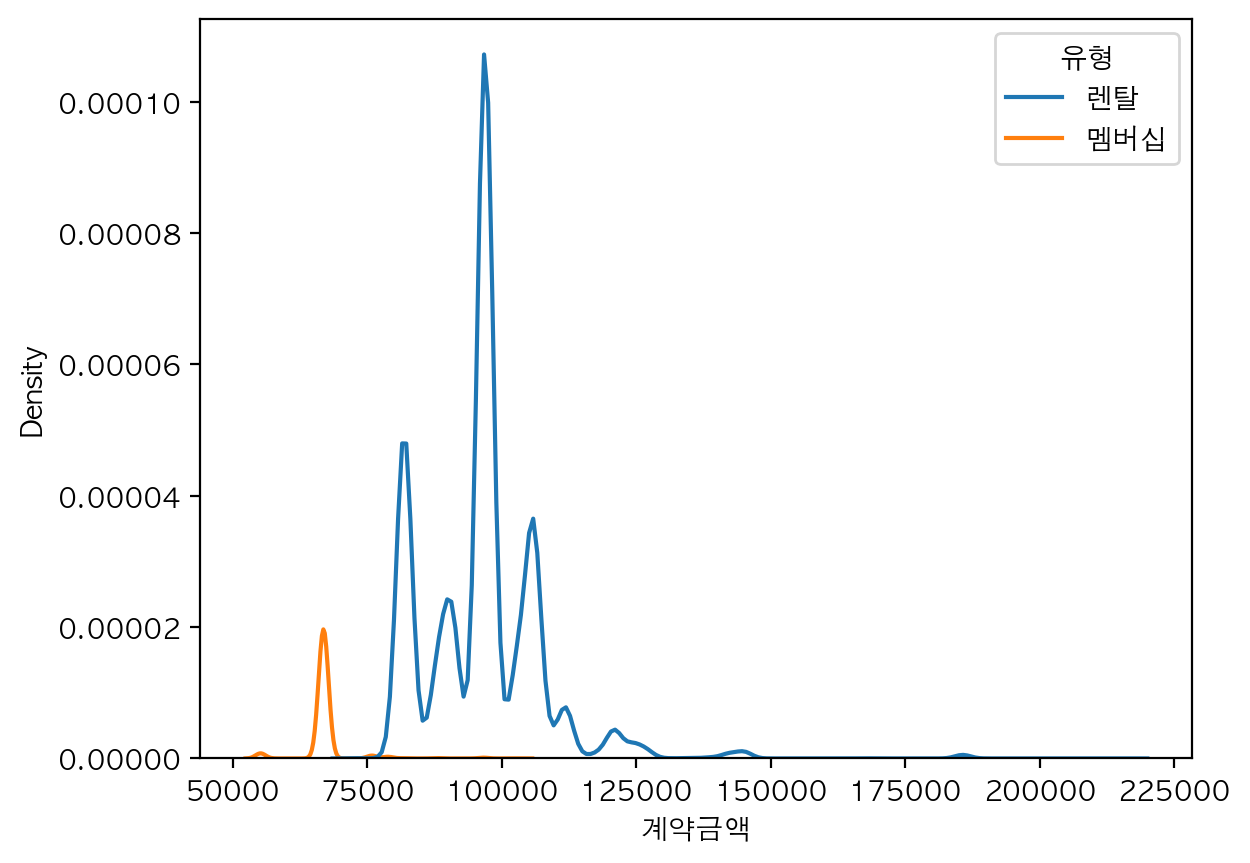

In [18]:
sns.kdeplot(data = df1, x = '계약금액', hue = '유형')

(0.0, 5e-06)

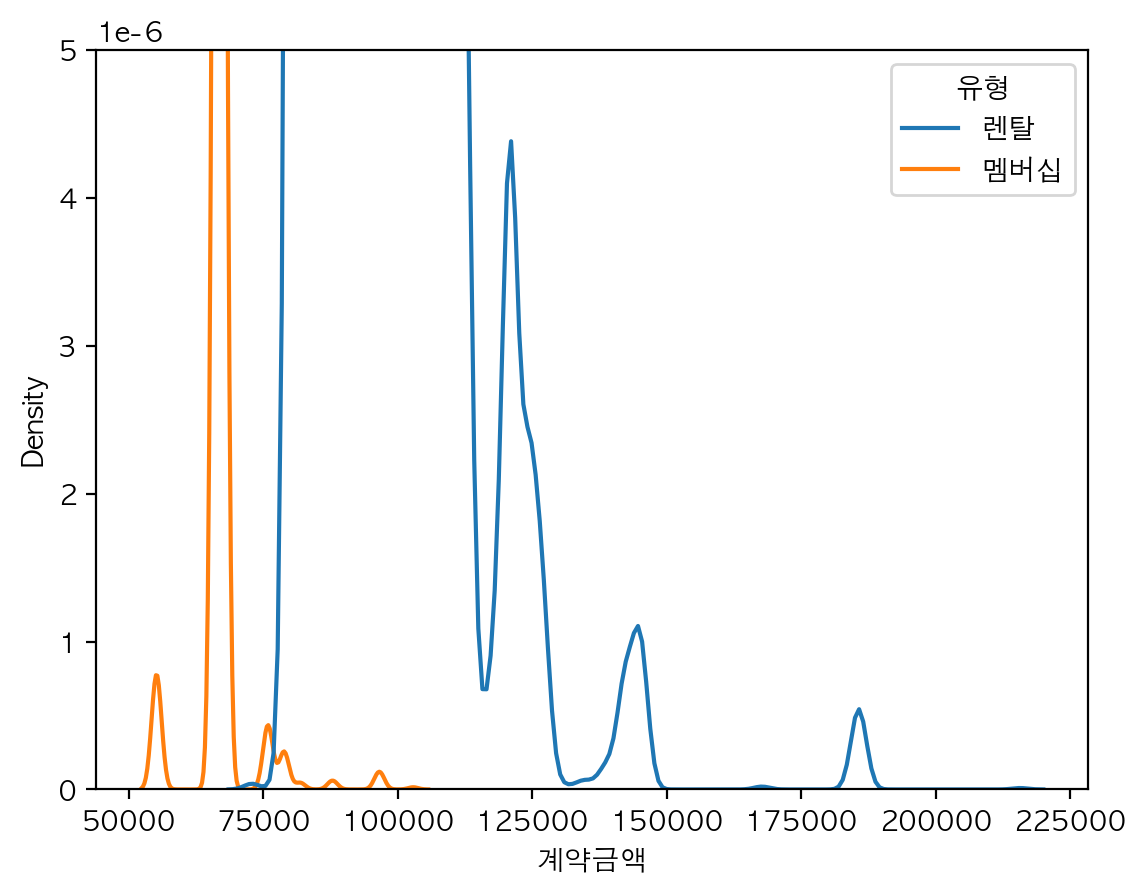

In [21]:
sns.kdeplot(data = df1, x = '계약금액', hue = '유형')
plt.ylim(0,0.000005)

#### Countplot
- [범주형] 데이터로 구성된 컬럼 하나 살펴볼 때

옵션 : x/y 축 변경 + [hue]

<Axes: xlabel='count', ylabel='경로'>

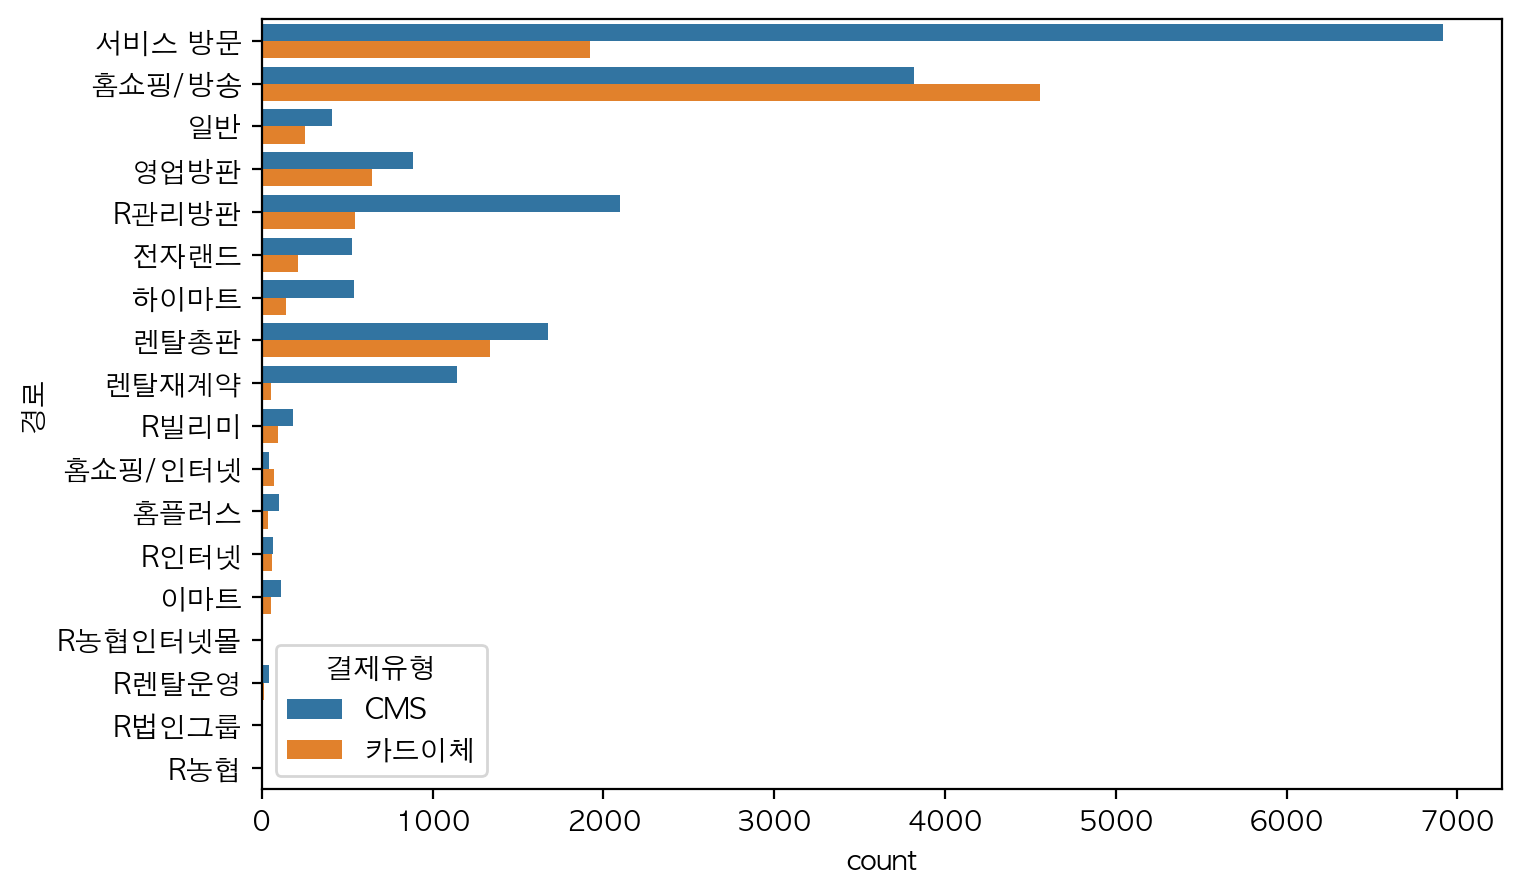

In [32]:
plt.figure(figsize = (8,5)) #시각화 사이즈 설정
sns.countplot(data = df1, y = '경로', hue = '결제유형') #x축으로 넣으면 데이터가 겹쳐 보여서, y축에 넣으면 안겹쳐 보임